# import pandas as pd
import numpy as np

In [63]:
df = pd.read_csv('ucs_data_A.csv')

In [64]:
df.head()

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,...,Comments,Unnamed: 12,Source Used for Orbital Data,Source,Source.1,Source.2,Source.3,Source.4,Source.5,Source.6
0,1HOPSAT-TD (1st-generation High Optical Perfor...,Lemur,NR (12/20),USA,Hera Systems,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,...,Pathfinder for planned earth observation const...,NaN,JMSatcat/3_20,https://spaceflightnow.com/2019/12/11/indias-5...,https://www.herasys.com/,NaN,NaN,NaN,NaN,NaN
1,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Aalto University,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,...,Technology development and education.,NaN,JMSatcat/10_17,https://directory.eoportal.org/web/eoportal/sa...,NaN,http://www.planet4589.org/space/log/satcat.txt,NaN,NaN,NaN,NaN
2,AAUSat-4,AAUSat-4,Denmark,Denmark,University of Aalborg,University of Aalborg,Denmark,Guiana Space Center,Soyuz-2.1a,2016-025E,...,Carries AIS system.,NaN,Space50,http://spaceflightnow.com/2016/04/26/soyuz-bla...,NaN,http://space50.org/objekt.php?mot=2016-025E&ja...,NaN,NaN,NaN,NaN
3,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,...,"32 C-band, 51 Ku-band, and 6 Ka-band transpond...",NaN,ZARYA,http://www.absatellite.net/satellite-fleet/?sa...,NaN,http://www.zarya.info/Diaries/Launches/Launche...,http://www.absatellite.net/2010/10/13/asia-bro...,http://www.spacenews.com/article/satellite-tel...,NaN,NaN
4,ABS-2A,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,...,NaN,NaN,Estimated,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df['Country/Org of UN Registry'].describe()

count     4550
unique      71
top        USA
freq      2493
Name: Country/Org of UN Registry, dtype: object

In [66]:
df['Country/Org of UN Registry'].unique()

array(['NR (12/20)', 'Finland', 'Denmark', 'NR', 'USA', 'ESA', 'France',
       'Lithuania', 'NR (5/21)', 'Norway', 'Spain', 'Brazil', 'Algeria',
       'United Kingdom', 'Russia', 'Canada', 'China', 'NR (7/20)',
       'Argentina', 'NR (9/21)', 'Japan', 'Luxembourg', 'Azerbaijan',
       'Mexico', 'Germany', 'Belarus', 'Indonesia', 'Australia', 'India',
       'South Korea', 'Belgium', 'Italy', 'United Arab Emirates', 'NR ',
       'Ethiopia', 'Colombia', 'Inda', 'Greece', 'Kazakhstan', 'Laos',
       'Czech Republic', 'Malaysia', 'EUMETSAT', 'EUMETSAT/ESA',
       'Nigeria', 'Uruguay', 'Sweden', 'Unit', 'Pakistan', 'New Zealand',
       'Peru', 'NR (4/21)', 'NR (4/28)', 'CR (5/21)', 'OR (5/21)',
       'Turkey', 'Saudi Arabia', 'Chile', 'BR (3/20)', 'Thailand',
       'NR  (12/20)', 'Egypt', 'Iraq', 'Bolivia', 'Austria',
       'Technologies', 'Israel', 'University', 'Venezuela',
       'South Africa', 'China/Sri Lanka'], dtype=object)

In [67]:
# Make "NR (Date)" entries into "NR"

for i,country in enumerate(df['Country/Org of UN Registry']):
    #print(type(country)) 
    #print(i)
    #print(country)
    if country[0:2] == "NR":
        
        df.at[i,'Country/Org of UN Registry'] = "NR"
        

In [68]:
#create new columns for multiple country collaborative launches

df['Country of Operator/Owner 1'] = "N/A"
df['Country of Operator/Owner 2'] = "N/A"
df['Country of Operator/Owner 3'] = "N/A"
df['Country of Operator/Owner 4'] = "N/A"
df['Country of Operator/Owner 5'] = "N/A"


#
df['Country of Contractor 1'] = "N/A"
df['Country of Contractor 2'] = "N/A"
df['Country of Contractor 3'] = "N/A"
df['Country of Contractor 4'] = "N/A"




In [69]:
# Break up countries with multiple slashes

for i,countries in enumerate(df['Country of Operator/Owner']):
    if ('/') in countries:
        list_operator_countries = countries.split('/')
        for j,country in enumerate(list_operator_countries):
            column_num = j+1
            column_name = 'Country of Operator/Owner ' + str(column_num)
            df.at[i,column_name] = country
            
    

In [72]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [147]:
X_train = train[['Country of Operator/Owner','Country of Operator/Owner 1','Country of Operator/Owner 2',\
                 'Country of Operator/Owner 3','Country of Operator/Owner 4','Country of Operator/Owner 5',\
                'Country of Contractor','Country of Contractor 1','Country of Contractor 2',\
                'Country of Contractor 3','Country of Contractor 4']]

X_test = test[['Country of Operator/Owner','Country of Operator/Owner 1','Country of Operator/Owner 2',\
                 'Country of Operator/Owner 3','Country of Operator/Owner 4','Country of Operator/Owner 5',\
                'Country of Contractor','Country of Contractor 1','Country of Contractor 2',\
                'Country of Contractor 3','Country of Contractor 4']]

y_train = train[['Country/Org of UN Registry']]

y_test = test[['Country/Org of UN Registry']]



In [152]:
y_test_labels = list(test['Country/Org of UN Registry'].unique())

In [153]:
y_test_labels

['NR',
 'USA',
 'China',
 'Brazil',
 'United Kingdom',
 'Luxembourg',
 'Uruguay',
 'India',
 'Russia',
 'South Korea',
 'France',
 'Saudi Arabia',
 'Argentina',
 'Finland',
 'Lithuania',
 'ESA',
 'Australia',
 'Sweden',
 'Japan',
 'Norway',
 'Pakistan',
 'EUMETSAT/ESA',
 'Nigeria',
 'OR (5/21)',
 'United Arab Emirates',
 'Mexico',
 'Spain',
 'Turkey',
 'Indonesia',
 'Canada',
 'Germany',
 'Italy',
 'Austria',
 'BR (3/20)']

In [101]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X_train)

OneHotEncoder(handle_unknown='ignore')

In [102]:
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [103]:
#encoder.fit(y_train)


In [104]:
#y_train = encoder.transform(y_train)
#y_test = encoder.transform(y_test)

In [105]:
np.shape(y_train)

(3640, 1)

In [114]:
y_train = np.array(y_train).squeeze()
y_test = np.array(y_test).squeeze()

In [121]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(max_iter = 1000)


In [122]:
lm.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [126]:
lm.score(X_test, y_test)

0.810989010989011

In [129]:
from sklearn import svm

In [133]:
clf = svm.LinearSVC()


In [134]:
clf.fit(X_train, y_train)

LinearSVC()

In [135]:
clf.score(X_test, y_test)

0.8241758241758241

In [136]:
predictions = clf.predict(X_test)

In [145]:
predictions

array(['China', 'USA', 'USA', 'USA', 'USA', 'USA', 'China',
       'United Arab Emirates', 'United Kingdom', 'USA', 'USA', 'USA',
       'China', 'USA', 'China', 'China', 'USA', 'China', 'USA', 'USA',
       'NR', 'United Kingdom', 'USA', 'USA', 'USA', 'USA', 'NR', 'NR',
       'USA', 'USA', 'USA', 'NR', 'China', 'USA', 'USA', 'Uruguay', 'USA',
       'China', 'USA', 'China', 'USA', 'United Kingdom', 'China', 'USA',
       'USA', 'Germany', 'USA', 'USA', 'USA', 'NR', 'USA', 'USA', 'USA',
       'China', 'USA', 'USA', 'USA', 'NR', 'USA', 'China', 'India', 'USA',
       'USA', 'NR', 'Russia', 'China', 'NR', 'China', 'USA', 'USA',
       'South Korea', 'USA', 'USA', 'NR', 'USA', 'USA', 'NR', 'Russia',
       'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'China', 'China',
       'France', 'Saudi Arabia', 'China', 'China', 'Uruguay', 'NR', 'NR',
       'USA', 'NR', 'USA', 'China', 'USA', 'NR', 'USA', 'NR', 'China',
       'USA', 'USA', 'Finland', 'NR', 'India', 'NR', 'ESA', 'Russia',
       'US

In [157]:
from sklearn.metrics import confusion_matrix

In [158]:
cm = confusion_matrix(y_test, predictions, labels = y_test_labels)

In [174]:
len(y_test_labels)

34

In [175]:
len(labels)

34

ValueError: The number of FixedLocator locations (17), usually from a call to set_ticks, does not match the number of ticklabels (34).

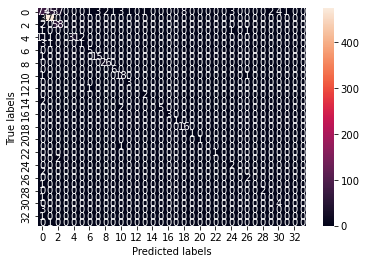

<Figure size 1440x720 with 0 Axes>

In [209]:
labels = y_test_labels

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()


plt.figure(figsize=(20,10))


hm = sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 


fig = hm.get_figure()

fig.savefig('cm.png', dpi = 300)
# labels, title and ticks
#ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(y_test_labels); ax.yaxis.set_ticklabels(y_test_labels);


